Bộ dữ liệu chứa dữ liệu về chi phí y tế mỗi năm cho các hợp đồng bảo hiểm y tế, các thông tin được thống kê bao gồm các thông tin về người được bảo hiểm:

- age: tuổi của người được bảo hiểm
- sex: giới tính (male, female)
- bmi: chỉ số trọng lượng cơ thể (body mass index)
- children: số con
- smoker: cho biết có phải người hút thuốc hay không (yes/no)
- region: vùng sinh sống (northeast, northwest, southeast, southwest)
- charges: chi phí y tế trong năm

File dữ liệu: insurance.csv

Hãy sử dụng bộ dữ liệu đã có để thực hiện:

- Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).
- Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.
- Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
- Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình.

# Set Up

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Trực quan hoá

Vẽ biểu đồ để trực quan hóa
- mối quan hệ giữa tuổi của người được bảo hiểm (age) với chi phí y tế (charges); và
- mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

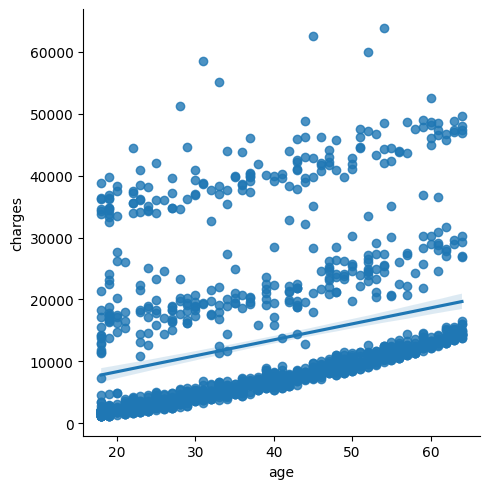

In [ ]:
sns.lmplot(data = df,
           x = 'age',
           y = 'charges')
plt.show()

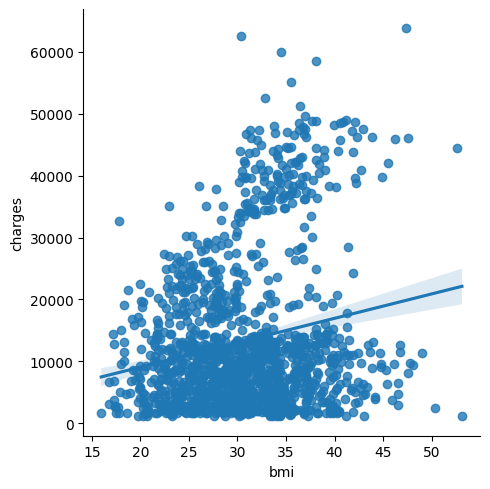

In [ ]:
sns.lmplot(data = df,
           x = 'bmi',
           y = 'charges')
plt.show()

Text(0.5, 1.0, 'Age vs. Charges')

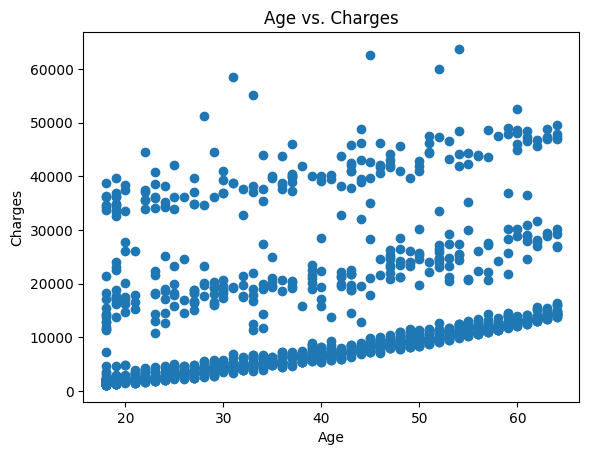

In [ ]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')

Text(0.5, 1.0, 'BMI vs. Charges')

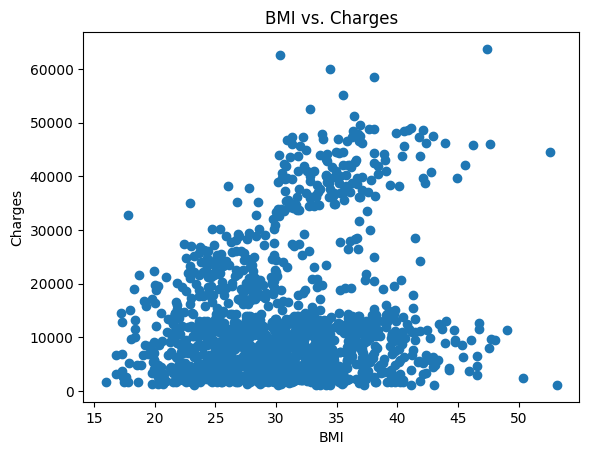

In [ ]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')

# Xử lý dữ liệu

Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết: sex_male, smoker_no.

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype='int')

In [ ]:
df.drop(['sex_male', 'smoker_no'], axis=1, inplace=True)

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [ ]:
q3 = df['charges'].quantile(0.75)
q1 = df['charges'].quantile(0.25)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [ ]:
df_normal = df[(df['charges'] >= lower) & (df['charges'] <= upper)]

# Tách dữ liệu

Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [ ]:
X = df_normal.drop('charges', axis=1)
y = df_normal['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(959, 9)

In [ ]:
X_test.shape

(240, 9)

# Xây mô hình

Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại.

Đánh giá mô hình.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([  242.10137678,    76.43541742,   357.71283622,   453.94218271,
       15120.71861705,   599.99930983,   514.74797715,  -353.5911442 ,
        -761.15614278])

In [ ]:
lr.intercept_

-4267.318178409072

# Đánh giá kết quả mô hình

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
mae

2796.3695609570714

In [ ]:
df_normal['charges'].describe()

count     1199.000000
mean      9927.753402
std       7241.158309
min       1121.873900
25%       4408.695900
50%       8410.046850
75%      12953.594600
max      34472.841000
Name: charges, dtype: float64

<Axes: xlabel='charges'>

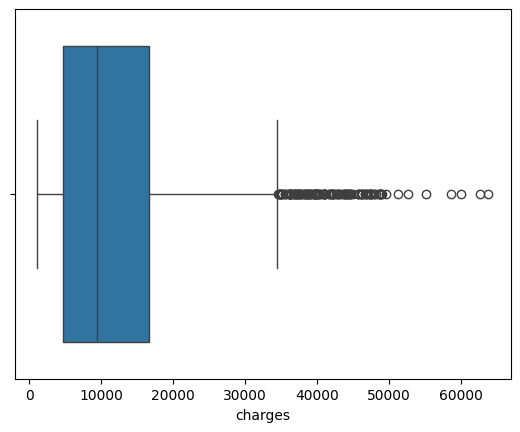

In [ ]:
sns.boxplot(df, x='charges')